## Questions to Answer
        
## 1.Which brewery produces the strongest beers by ABV%?
        ## 2.If you had to pick 3 beers to recommend using only this data, which would you pick?
        ## 3. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
        ## 4.Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
        
        
### All of the Null Treatments and other subsettings have been copied from the EDA.ipynb jupyter notebook Please refer to that if you find any confusions


### **Let us check the ABV for all these beers**

In [3]:
## Loading the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline


In [6]:
df_raw = pd.read_csv('C:/Lean_Skill_InterviewTest/data/beer-review-data-set.csv')
df_raw["user_birthdayRaw"].fillna(0,inplace= True)
df_raw["review_text"].fillna(0,inplace= True)
df_raw["user_birthdayRaw"].fillna('unknwn',inplace= True)
df_raw["user_birthdayUnix"].fillna(0,inplace= True)
df_raw["user_gender"].fillna('unknwn',inplace= True)
df_raw["user_ageInSeconds"].fillna('0',inplace= True)
df_raw["user_profileName"].fillna('unknwn',inplace= True)
df_raw.isnull().sum()
df_raw.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_aroma', 'review_overall',
       'review_palate', 'review_taste', 'review_text', 'review_timeStruct',
       'review_timeUnix', 'user_ageInSeconds', 'user_birthdayRaw',
       'user_birthdayUnix', 'user_gender', 'user_profileName'],
      dtype='object')

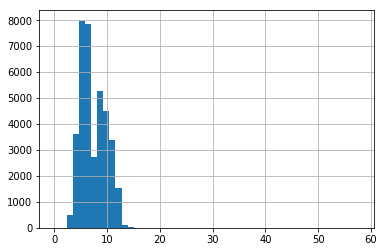

In [7]:
df_raw['beer_ABV'].hist(bins=50)

***So the average ABV ranges between 4 to roughly 15***

***lets check for everything thats going above 14***

### ***Answer 1***

In [8]:
abv_above_14=df_raw[df_raw['beer_ABV'] > 14.]

In [9]:
Top_Highest_ABV_beers=abv_above_14.groupby('beer_name')['beer_ABV'].mean()
Top_Highest_ABV_beers

beer_name
Enrico's Cure                                        14.50
Jeffersons Reserve Big Fella Bourbon Barrel Stout    16.00
Schorsch Weizen 16%                                  16.00
Schorschbock                                         16.00
SchorschbrÃ¤u Schorschbock 31%                       30.86
SchorschbrÃ¤u Schorschbock 40%                       39.44
SchorschbrÃ¤u Schorschbock 43%                       43.00
SchorschbrÃ¤u Schorschbock 57%                       57.70
Trafalgar Korruptor                                  15.00
Name: beer_ABV, dtype: float64

***A total of 9 beers are there who get above the 14 % average mark of ABV this percentage can also be changed based on the higher amount of ABV %
since we have found the total beers with the highest ABV %  lets try to figure out how can we find the highest ABV % producing brewery also***

In [10]:
abv_above_14=df_raw[df_raw['beer_ABV'] > 14.]
Top_Highest_ABV_brewerId=abv_above_14.groupby(['beer_brewerId','beer_name'])['beer_ABV'].mean()
Top_Highest_ABV_brewerId

beer_brewerId  beer_name                                        
395            Jeffersons Reserve Big Fella Bourbon Barrel Stout    16.00
765            Trafalgar Korruptor                                  15.00
6513           Schorsch Weizen 16%                                  16.00
               Schorschbock                                         16.00
               SchorschbrÃ¤u Schorschbock 31%                       30.86
               SchorschbrÃ¤u Schorschbock 40%                       39.44
               SchorschbrÃ¤u Schorschbock 43%                       43.00
               SchorschbrÃ¤u Schorschbock 57%                       57.70
13228          Enrico's Cure                                        14.50
Name: beer_ABV, dtype: float64

***A total of 4 brewers are there who get above the 14 % average mark of ABV inclusive of the 9 beers that are there in the high ABV % 
by looking at the above data we can say that SchorschbrÃ¤u Schorschbock 57%  has the highest % of ABV from all the comparative breweries***

In [25]:
df_raw['beer_ABV'].argmax() ### python 2 versions are depricated

c:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


33166

In [26]:
df_raw['beer_ABV'].idxmax() ### so using python 3 for stability purposes

33166

In [31]:
High_ABV_Brewery=df_raw.iloc[33166]
High_ABV_Brewery

index                                                            11997
beer_ABV                                                          57.7
beer_beerId                                                      73368
beer_brewerId                                                     6513
beer_name                               SchorschbrÃ¤u Schorschbock 57%
beer_style                                                     Eisbock
review_appearance                                                    4
review_aroma                                                         4
review_overall                                                       4
review_palate                                                        4
review_taste                                                       3.5
review_text          New world strongest beer. Very limited, only 3...
review_timeStruct    {'min': 28, 'hour': 12, 'mday': 23, 'sec': 21,...
review_timeUnix                                             1316780901
user_a